# Predictive Modeling
## 1. Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('./data/modified_data.csv', index_col=0)
# Shuffle rows
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
data.head()

,Year,Player,Age,Tm,G,TS%,3PAr,FTr,TRB%,AST%,STL%,BLK%,TOV%,USG%,WS,WS/48,3P%,FT%,Pick,GS%,FGA/48,3PA/48,FTA/48,PF/48,MPG,Improvement,Frontcourt,Imprv_prev_year,Tm_WS,Tm_next,Change_team
0,1997.0,Rasheed Wallace,22,POR,62.0,0.588,0.048,0.389,13.1,7.1,1.3,2.4,12.5,21.7,6.4,0.163,0.273,0.638,4.0,0.903226,17.276956,0.837209,6.723044,5.023256,30.516129,1.2,1,4.1,51.4,POR,True
1,2004.0,Carlos Arroyo,24,UTA,71.0,0.517,0.152,0.293,5.7,34.6,1.7,0.2,15.2,23.7,4.7,0.112,0.325,0.804,61.0,1.000000,18.358566,2.796813,5.378486,3.944223,28.281690,-3.4,0,4.4,37.2,DET,False
2,2004.0,Paul Pierce,26,BOS,80.0,0.517,0.257,0.422,9.6,25.1,2.2,1.3,14.6,30.5,7.1,0.109,0.299,0.819,10.0,1.000000,23.186834,5.947725,9.773475,3.624395,38.737500,4.1,0,-3.0,31.8,BOS,True
3,2003.0,Toni Kukoc,34,MIL,63.0,0.551,0.456,0.336,9.1,21.8,2.5,1.3,15.6,21.4,4.0,0.112,0.361,0.706,29.0,0.000000,16.253521,7.408451,5.464789,3.774648,27.047619,-0.9,1,2.0,44.8,MIL,True
4,1985.0,Wayne Cooper,28,DEN,80.0,0.505,0.002,0.275,16.6,5.4,0.6,5.4,13.4,20.6,3.5,0.082,0.200,0.685,40.0,0.975000,20.230428,0.047267,5.553914,7.184638,25.387500,1.6,1,-0.6,45.8,DEN,True


In [3]:
# Separate target data
target = data['Improvement']
data.drop('Improvement', axis=1, inplace=True)
# Drop columns that are not going to be used for modeling.
data.drop(['Year','Player','Tm','Tm_next','WS'], axis=1, inplace=True)
# Since a lot of the features are percentages, I think it makes the most sense to scale the data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [4]:
data.head()

,Age,G,TS%,3PAr,FTr,TRB%,AST%,STL%,BLK%,TOV%,USG%,WS/48,3P%,FT%,Pick,GS%,FGA/48,3PA/48,FTA/48,PF/48,MPG,Frontcourt,Imprv_prev_year,Tm_WS,Change_team
0,22,62.0,0.588,0.048,0.389,13.1,7.1,1.3,2.4,12.5,21.7,0.163,0.273,0.638,4.0,0.903226,17.276956,0.837209,6.723044,5.023256,30.516129,1,4.1,51.4,True
1,24,71.0,0.517,0.152,0.293,5.7,34.6,1.7,0.2,15.2,23.7,0.112,0.325,0.804,61.0,1.000000,18.358566,2.796813,5.378486,3.944223,28.281690,0,4.4,37.2,False
2,26,80.0,0.517,0.257,0.422,9.6,25.1,2.2,1.3,14.6,30.5,0.109,0.299,0.819,10.0,1.000000,23.186834,5.947725,9.773475,3.624395,38.737500,0,-3.0,31.8,True
3,34,63.0,0.551,0.456,0.336,9.1,21.8,2.5,1.3,15.6,21.4,0.112,0.361,0.706,29.0,0.000000,16.253521,7.408451,5.464789,3.774648,27.047619,1,2.0,44.8,True
4,28,80.0,0.505,0.002,0.275,16.6,5.4,0.6,5.4,13.4,20.6,0.082,0.200,0.685,40.0,0.975000,20.230428,0.047267,5.553914,7.184638,25.387500,1,-0.6,45.8,True


In [5]:
target.head()

0    1.2
1   -3.4
2    4.1
3   -0.9
4    1.6
Name: Improvement, dtype: float64

In [6]:
# Create training and testing sets
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(scaled_data, target.values, random_state=123)

## 2. Regression models
### 2.1 Establish benchmark
In EDA, I saw a clean negative relationship between player improvement and age. I will build a simple linear model using age and use that as the benchmark.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Find the column index of 'Age'
age_col = data.columns.tolist().index('Age')
# Run the simple linear regression model based on age
lm = LinearRegression()
lm.fit(Xtrain[:,age_col].reshape(-1,1), ytrain)
ypred = lm.predict(Xtest[:,age_col].reshape(-1,1))
print('RMSE of simple linear model is', np.sqrt(mean_squared_error(ytest, ypred)))

RMSE of simple linear model is 2.1606349639032274


### 2.2 Linear Models
#### 2.2.1 Linear Regression

In [8]:
lm = LinearRegression()
lm.fit(Xtrain, ytrain)
ypred = lm.predict(Xtest)
print('RMSE of linear regression model is', np.sqrt(mean_squared_error(ytest, ypred)))

RMSE of linear regression model is 2.011304844379551


In [9]:
# Take a look at coefficients to see which features are most important
print(pd.Series(lm.coef_, index=data.columns))

Age               -3.042718
G                 -1.456619
TS%                0.814433
3PAr               0.257391
FTr               -0.349302
TRB%               1.583613
AST%               0.911715
STL%               0.647752
BLK%               1.156913
TOV%               0.368385
USG%              -1.271322
WS/48             -4.552501
3P%                0.348328
FT%                0.871742
Pick              -0.262332
GS%               -0.657334
FGA/48             0.707239
3PA/48            -0.459601
FTA/48             1.077416
PF/48             -0.663060
MPG                0.260543
Frontcourt        -0.224282
Imprv_prev_year   -6.608773
Tm_WS             -0.061517
Change_team        0.388727
dtype: float64


The linear regression model reduced the RMSE by 10%. The most important features are age, WS/48(how good a player is), and improvement last year.<br>
Let's try linear models with regularization.
#### 2.2.2 Ridge Regression

In [10]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# Grid search alpha and l1_ratio
lm = Ridge(random_state=42)
params = {
    'alpha':[0.01, 0.1, 1, 10]
}
# Write a function that runs GridSearchCv, and output results
def grid_search_cv(regressor, params, Xtrain, ytrain):
    model = GridSearchCV(regressor, params, scoring='neg_mean_squared_error')
    model.fit(Xtrain, ytrain)
    print('Best parameters were', model.best_params_)
    print('Best RMSE was', np.sqrt(-1*model.best_score_))
grid_search_cv(lm, params, Xtrain, ytrain)

Best parameters were {'alpha': 1}
Best RMSE was 1.973040689638111


In [11]:
lm = Ridge(alpha=0.1, random_state=42)
lm.fit(Xtrain, ytrain)
ypred = lm.predict(Xtest)
print('RMSE of Ridge regression model is', np.sqrt(mean_squared_error(ytest, ypred)))

RMSE of Ridge regression model is 2.0112690789184113


In [12]:
print(pd.Series(lm.coef_, index=data.columns))

Age               -3.040653
G                 -1.457320
TS%                0.779142
3PAr               0.262069
FTr               -0.331819
TRB%               1.563385
AST%               0.891136
STL%               0.638203
BLK%               1.149159
TOV%               0.387733
USG%              -1.215079
WS/48             -4.492926
3P%                0.344335
FT%                0.865696
Pick              -0.262551
GS%               -0.656374
FGA/48             0.681690
3PA/48            -0.464595
FTA/48             1.044194
PF/48             -0.661139
MPG                0.258177
Frontcourt        -0.224064
Imprv_prev_year   -6.595970
Tm_WS             -0.073928
Change_team        0.388747
dtype: float64


There was almost no difference between the linear regression model and the Ridge regression model.

#### 2.2.3 Lasso Regression

In [13]:
from sklearn.linear_model import Lasso
# Grid search alpha and l1_ratio
lm = Lasso(random_state=42)
params = {
    'alpha':[1e-6, 1e-5, 1e-4, 0.001, 0.01, 0.1]
}
grid_search_cv(lm, params, Xtrain, ytrain)

Best parameters were {'alpha': 0.0001}
Best RMSE was 1.973117970670825


In [14]:
lm = Lasso(alpha=1e-5, random_state=42)
lm.fit(Xtrain, ytrain)
ypred = lm.predict(Xtest)
print('RMSE of Lasso regression model is', np.sqrt(mean_squared_error(ytest, ypred)))

RMSE of Lasso regression model is 2.0113048054379887


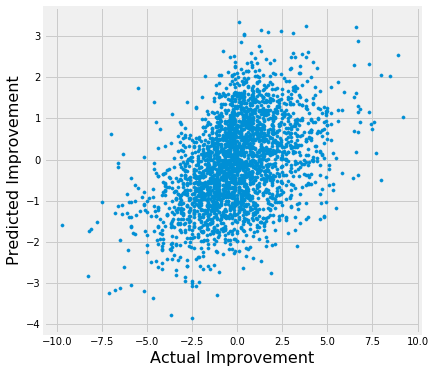

In [15]:
def plot_predict_true(ytest, ypred):
    plt.figure(figsize=(6,6))
    _ = plt.scatter(ytest, ypred, s=10)
    _ = plt.xlabel('Actual Improvement', fontsize=16)
    _ = plt.ylabel('Predicted Improvement', fontsize=16)
plot_predict_true(ytest, ypred)

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


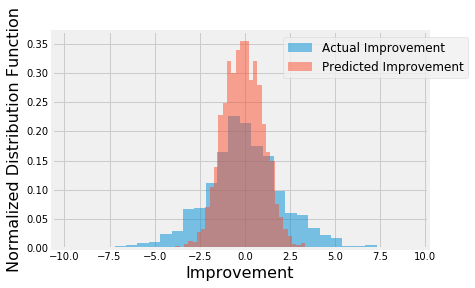

In [16]:
# The prediction space was tighter than the distribution of actual values.
_ = plt.hist(ytest, bins=30, alpha=0.5, normed=True, label='Actual Improvement')
_ = plt.hist(ypred, bins=30, alpha=0.5, normed=True, label='Predicted Improvement')
_ = plt.xlabel('Improvement', fontsize=16)
_ = plt.ylabel('Normalized Distribution Function', fontsize=16)
_ = plt.legend(fontsize=12, bbox_to_anchor=(0.6,1))

In [17]:
# Try to scale the predicted improvement up to match the range of actual improvements
# and evaluate the performances.
for i in np.linspace(1.5, 3, 16):
    ypred_copy = ypred * i
    print('Factor = {:.1f}, RMSE = {}'.format(i, np.sqrt(mean_squared_error(ytest, ypred_copy))))

Factor = 1.5, RMSE = 2.1133497453149075
Factor = 1.6, RMSE = 2.149747560478838
Factor = 1.7, RMSE = 2.1909460214919148
Factor = 1.8, RMSE = 2.236679868005742
Factor = 1.9, RMSE = 2.2866769912555465
Factor = 2.0, RMSE = 2.3406642134824156
Factor = 2.1, RMSE = 2.3983720991041806
Factor = 2.2, RMSE = 2.459538769523655
Factor = 2.3, RMSE = 2.523912767779995
Factor = 2.4, RMSE = 2.591255068008593
Factor = 2.5, RMSE = 2.661340350864947
Factor = 2.6, RMSE = 2.7339576745714447
Factor = 2.7, RMSE = 2.8089106673403927
Factor = 2.8, RMSE = 2.886017355352111
Factor = 2.9, RMSE = 2.9651097249904503
Factor = 3.0, RMSE = 3.0460331013658886


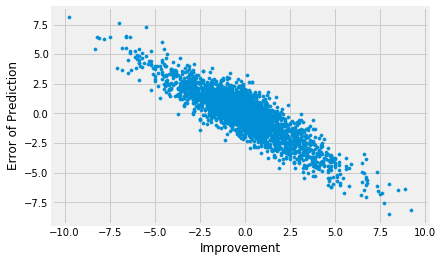

In [18]:
# No, it doesn't work. If I scale up the predictions, error only increase.
# Take a look at residual vs target value
_ = plt.scatter(ytest, ypred-ytest, s=10)
_ = plt.xlabel('Improvement')
_ = plt.ylabel('Error of Prediction')

The errors change with target values. This is not right. Linear regression models should have constant errors regardless of the predicted value. I think the reason we are seeing this is because there are more samples with smaller values(closer to 0) than those with larger values. So the weights of samples are unbalanced in determining the mean squared error. In other words, since there are more samples with smaller values, the models try to prioritize minimizing errors on those samples and tend to ignore samples with larger values.<br>
To remedy this, I can assign weights to samples, with weights being inverse proportional to the number of samples with similar target values.

In [19]:
from collections import Counter
def calc_weights(y):
    # Values outside 6 and -6 can be considered outliers and not give too much weight
    y_copy = y.copy()
    y_copy[y_copy>6] = 6
    y_copy[y_copy<-6] = -6
    # Count samples with different target values (using bins with width 1)
    n_samples = Counter(np.round(y_copy, 0))
    # Calculate weights = 1/n(samples with similar y)
    def transform_values(value):
        if value > 6:
            return 1/n_samples[6]
        elif value < -6:
            return 1/n_samples[-6]
        else:
            return 1/n_samples[np.round(value, 0)]
    return np.vectorize(transform_values)(y)
# Calculate weights for training set
ytrain_weights = calc_weights(ytrain)

In [20]:
# Run the linear regression with weights
lm = LinearRegression()
lm.fit(Xtrain, ytrain, sample_weight=ytrain_weights)
ypred = lm.predict(Xtest)

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


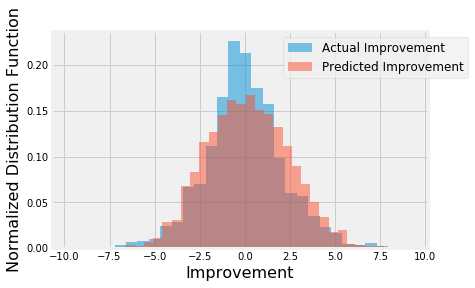

In [21]:
# Check distribution of prediction again
_ = plt.hist(ytest, bins=30, alpha=0.5, normed=True, label='Actual Improvement')
_ = plt.hist(ypred, bins=30, alpha=0.5, normed=True, label='Predicted Improvement')
_ = plt.xlabel('Improvement', fontsize=16)
_ = plt.ylabel('Normalized Distribution Function', fontsize=16)
_ = plt.legend(fontsize=12, bbox_to_anchor=(0.6,1))

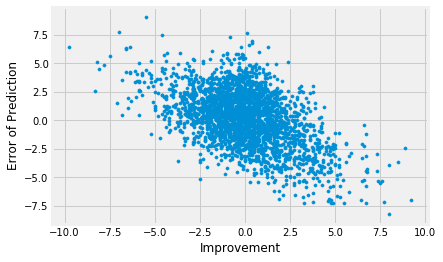

In [22]:
# Check residual and true value again
_ = plt.scatter(ytest, ypred-ytest, s=10)
_ = plt.xlabel('Improvement')
_ = plt.ylabel('Error of Prediction')

With the weighted method, the range of predicted values is more similar to the range of actual values. In terms of errors, it is still not constant across different target values. We can see the weighted model have higher errors for smaller values and lower errors for larger values compared to the unweighted model.<br>
Practically speaking, accuracy on larger values is more important than accuracy on smaller values, because players with large improvement/decline have more impact on the team as players whose performance did not change much. So it might be worthwhile to sacrifice some accuracy on the smaller values to achieve higher accuracy on larger values.

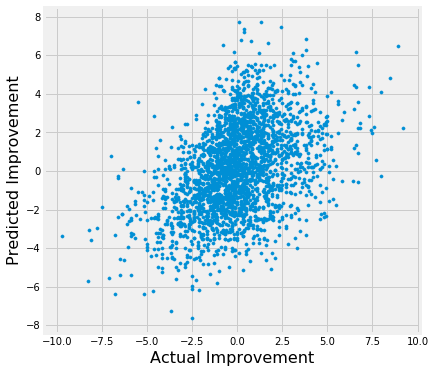

In [23]:
# Plot the prediction against true values again
plot_predict_true(ytest, ypred)

In [24]:
# Recalculate the mean squared error with sample weights
# Calculate sample weights for the test set.
ytest_weights = calc_weights(ytest)
print('The root of weighted squared error of this model is', 
      np.sqrt(mean_squared_error(ytest, ypred, sample_weight=ytest_weights)))

The root of weighted squared error of this model is 3.1049142778362544


In [25]:
# Re-evaluate the bench mark model using the same metric.
lm = LinearRegression()
lm.fit(Xtrain[:,age_col].reshape(-1,1), ytrain)
ypred = lm.predict(Xtest[:,age_col].reshape(-1,1))
print('The root of weighted squared error of this model is', 
      np.sqrt(mean_squared_error(ytest, ypred, sample_weight=ytest_weights)))

The root of weighted squared error of this model is 3.75293695142431


We can see that by assigning more weights to under-represented samples (samples with larger improvement/decline), we can achieve higher accuracy for those samples.<br>
For other algorithms, I've already gone ahead and tried using standard approaches, and the results are similar in that they all try to focus on over-represented samples, and predict a tighter range of values than the actual improvements. There is no need to show them repeatedly. I am going to use the weighted approach for these algorithms.
### 2.3. SVM

In [26]:
# GridSearchCV cannot perform the weighted approach I want here.
# I will write my own code to do hyperparameter tuning with 2-fold CV.
from sklearn.model_selection import KFold
from sklearn.svm import SVR
kf = KFold(n_splits=2)
for c in [1, 10, 100, 1000, 10000, 1e5]:
    error = 0
    for train_index, test_index in kf.split(Xtrain, ytrain):
        CV_Xtrain, CV_ytrain = Xtrain[train_index], ytrain[train_index]
        CV_Xtest, CV_ytest = Xtrain[test_index], ytrain[test_index]
        CV_train_weights = calc_weights(CV_ytrain)
        CV_test_weights = calc_weights(CV_ytest)
        clf = SVR(C=c)
        clf.fit(CV_Xtrain, CV_ytrain, sample_weight=CV_train_weights)
        CV_ypred = clf.predict(CV_Xtest)
        error += np.sqrt(mean_squared_error(CV_ytest, CV_ypred, sample_weight=CV_test_weights))
    print("C = {}\tThe root of weighted squared error = {}".format(c,error/2))

C = 1	The root of weighted squared error = 3.9034690445781832
C = 10	The root of weighted squared error = 3.6894062647124657
C = 100	The root of weighted squared error = 3.2004787816615075
C = 1000	The root of weighted squared error = 2.9416696284701427
C = 10000	The root of weighted squared error = 2.8698075542736374
C = 100000.0	The root of weighted squared error = 2.916313211002705


In [27]:
svr = SVR(C=10000)
svr.fit(Xtrain, ytrain, sample_weight=ytrain_weights)
ypred = svr.predict(Xtest)
print('The root of weighted squared error of this model is', 
      np.sqrt(mean_squared_error(ytest, ypred, sample_weight=ytest_weights)))

The root of weighted squared error of this model is 3.0293904785191916


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


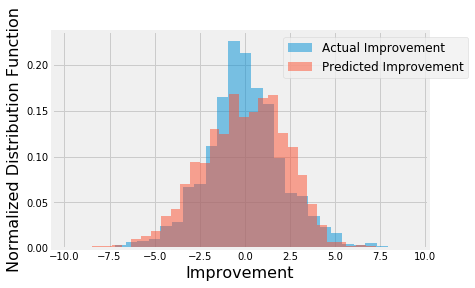

In [28]:
# Check distribution of prediction again
_ = plt.hist(ytest, bins=30, alpha=0.5, normed=True, label='Actual Improvement')
_ = plt.hist(ypred, bins=30, alpha=0.5, normed=True, label='Predicted Improvement')
_ = plt.xlabel('Improvement', fontsize=16)
_ = plt.ylabel('Normalized Distribution Function', fontsize=16)
_ = plt.legend(fontsize=12, bbox_to_anchor=(0.6,1))

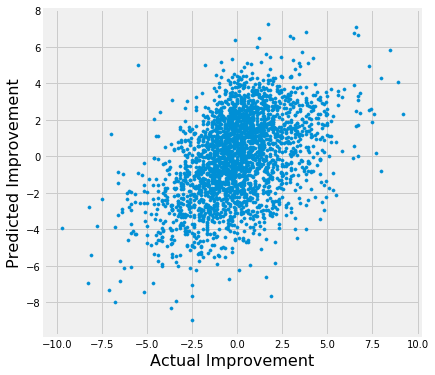

In [29]:
plot_predict_true(ytest, ypred)

RMSE is slightly better than linear models.
### 2.4. Random Forest

In [30]:
# Tune n_estimators and min_samples_split
from sklearn.ensemble import RandomForestRegressor
for n in [101, 201, 401, 601, 801, 1001]:
    for m in [10, 100, 200, 300]:
        error = 0
        for train_index, test_index in kf.split(Xtrain, ytrain):
            CV_Xtrain, CV_ytrain = Xtrain[train_index], ytrain[train_index]
            CV_Xtest, CV_ytest = Xtrain[test_index], ytrain[test_index]
            CV_train_weights = calc_weights(CV_ytrain)
            CV_test_weights = calc_weights(CV_ytest)
            clf = RandomForestRegressor(
                random_state=42, n_jobs=-1, n_estimators=n, min_samples_split=m)
            clf.fit(CV_Xtrain, CV_ytrain, sample_weight=CV_train_weights)
            CV_ypred = clf.predict(CV_Xtest)
            error += np.sqrt(mean_squared_error(CV_ytest, CV_ypred, sample_weight=CV_test_weights))
        print("n_estimator = {} min_samples_split = {}\tThe root of weighted squared error = {}".format(n,m,error/2))

n_estimator = 101 min_samples_split = 10	The root of weighted squared error = 3.1954846020896586
n_estimator = 101 min_samples_split = 100	The root of weighted squared error = 2.9911686731272247
n_estimator = 101 min_samples_split = 200	The root of weighted squared error = 2.988427643556917
n_estimator = 101 min_samples_split = 300	The root of weighted squared error = 3.001086903841794
n_estimator = 201 min_samples_split = 10	The root of weighted squared error = 3.1857505631630865
n_estimator = 201 min_samples_split = 100	The root of weighted squared error = 2.9899566624034
n_estimator = 201 min_samples_split = 200	The root of weighted squared error = 2.987628385863763
n_estimator = 201 min_samples_split = 300	The root of weighted squared error = 3.003132477644989
n_estimator = 401 min_samples_split = 10	The root of weighted squared error = 3.1860114606547008
n_estimator = 401 min_samples_split = 100	The root of weighted squared error = 2.989740233560331
n_estimator = 401 min_samples_s

In [31]:
# Run the model with best parameters
rf = RandomForestRegressor(random_state=42, n_estimators=401, min_samples_split=200)
rf.fit(Xtrain, ytrain, sample_weight=ytrain_weights)
ypred = rf.predict(Xtest)
print('The root of weighted squared error of this model is', 
      np.sqrt(mean_squared_error(ytest, ypred, sample_weight=ytest_weights)))

The root of weighted squared error of this model is 3.0789433392321874


### 2.5 Gradient Boost

In [32]:
# Tune max_depth and max_features first
from sklearn.ensemble import GradientBoostingRegressor
for d in [2, 3, 5, 10]:
    for f in ['sqrt', None]:
        error = 0
        for train_index, test_index in kf.split(Xtrain, ytrain):
            CV_Xtrain, CV_ytrain = Xtrain[train_index], ytrain[train_index]
            CV_Xtest, CV_ytest = Xtrain[test_index], ytrain[test_index]
            CV_train_weights = calc_weights(CV_ytrain)
            CV_test_weights = calc_weights(CV_ytest)
            clf = GradientBoostingRegressor(
                random_state=42, min_samples_split=200, max_depth=d, max_features=f)
            clf.fit(CV_Xtrain, CV_ytrain, sample_weight=CV_train_weights)
            CV_ypred = clf.predict(CV_Xtest)
            error += np.sqrt(mean_squared_error(CV_ytest, CV_ypred, sample_weight=CV_test_weights))
        print("max_depth = {} max_features = {}\tThe root of weighted squared error = {}".format(d,f,error/2))

max_depth = 2 max_features = sqrt	The root of weighted squared error = 2.9280262952167186
max_depth = 2 max_features = None	The root of weighted squared error = 2.9186784871885374
max_depth = 3 max_features = sqrt	The root of weighted squared error = 2.9081280781994945
max_depth = 3 max_features = None	The root of weighted squared error = 2.928704951966247
max_depth = 5 max_features = sqrt	The root of weighted squared error = 2.9465562355470567
max_depth = 5 max_features = None	The root of weighted squared error = 2.9868995983517355
max_depth = 10 max_features = sqrt	The root of weighted squared error = 3.048066000349715
max_depth = 10 max_features = None	The root of weighted squared error = 3.069503024672799


In [33]:
# Tune learning rate and n_estimators
for n in [51, 101, 201, 401]:
    for l in [0.01, 0.05, 0.1, 0.15]:
        error = 0
        for train_index, test_index in kf.split(Xtrain, ytrain):
            CV_Xtrain, CV_ytrain = Xtrain[train_index], ytrain[train_index]
            CV_Xtest, CV_ytest = Xtrain[test_index], ytrain[test_index]
            CV_train_weights = calc_weights(CV_ytrain)
            CV_test_weights = calc_weights(CV_ytest)
            clf = GradientBoostingRegressor(
                random_state=42, min_samples_split=200, max_depth=2,
                max_features='sqrt', learning_rate=l, n_estimators=n)
            clf.fit(CV_Xtrain, CV_ytrain, sample_weight=CV_train_weights)
            CV_ypred = clf.predict(CV_Xtest)
            error += np.sqrt(mean_squared_error(CV_ytest, CV_ypred, sample_weight=CV_test_weights))
        print("n_estimators = {} learning_rate = {}\tThe root of weighted squared error = {}".format(n,l,error/2))

n_estimators = 51 learning_rate = 0.01	The root of weighted squared error = 3.6208175131545004
n_estimators = 51 learning_rate = 0.05	The root of weighted squared error = 3.1324273382850634
n_estimators = 51 learning_rate = 0.1	The root of weighted squared error = 2.9787541162770994
n_estimators = 51 learning_rate = 0.15	The root of weighted squared error = 2.9514314270895534
n_estimators = 101 learning_rate = 0.01	The root of weighted squared error = 3.40876244437526
n_estimators = 101 learning_rate = 0.05	The root of weighted squared error = 2.9876144662909208
n_estimators = 101 learning_rate = 0.1	The root of weighted squared error = 2.92787533848935
n_estimators = 101 learning_rate = 0.15	The root of weighted squared error = 2.91960981880458
n_estimators = 201 learning_rate = 0.01	The root of weighted squared error = 3.175384404553955
n_estimators = 201 learning_rate = 0.05	The root of weighted squared error = 2.931663753051877
n_estimators = 201 learning_rate = 0.1	The root of wei

In [34]:
gb = GradientBoostingRegressor(
        random_state=42, max_depth=2, max_features='sqrt', min_samples_split=200,
        learning_rate=0.05, n_estimators=201
     )
gb.fit(Xtrain, ytrain, sample_weight=ytrain_weights)
ypred = gb.predict(Xtest)
print('The root of weighted squared error of this model is', 
      np.sqrt(mean_squared_error(ytest, ypred, sample_weight=ytest_weights)))

The root of weighted squared error of this model is 3.058864958853836


It appears that SVM was the best model based on the weighted squared error metric.<br>
Regression models are good in answering the "how much will a player improve" question, but sometimes it maybe more useful to answer "will a player improve" or "the probability a player will improve" question, as the answers to these questions are often more straightforward. To answer these, I would use classficiation models.

## 3. Using classification models

In [35]:
# Transform the target values into classes
ytrain_class = (ytrain >= 0).astype(int)
ytest_class = (ytest >= 0).astype(int)

### 3.1 Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
params = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
# Write a function a run gridsearchcv
def grid_search_cv_class(clf, params, Xtrain, ytrain):
    # Use log loss as evaluation metric because 
    # probabilities are going to be more important than the class prediction.
    model = GridSearchCV(clf, params, scoring='neg_log_loss', n_jobs=-1)
    model.fit(Xtrain, ytrain)
    print('Best parameters were', model.best_params_)
grid_search_cv_class(clf, params, Xtrain, ytrain_class)

Best parameters were {'C': 1, 'penalty': 'l1'}


In [37]:
# Check coefficients
logreg = LogisticRegression(C=10, penalty='l2', random_state=42)
logreg.fit(Xtrain, ytrain_class)
coefs = pd.Series(logreg.coef_.reshape(-1), index=data.columns)
print(coefs)

Age               -2.962061
G                 -1.649505
TS%               -0.570911
3PAr              -0.532532
FTr               -0.258137
TRB%               1.960250
AST%               0.893312
STL%               0.653405
BLK%               0.777162
TOV%               0.736397
USG%              -1.587666
WS/48             -4.298991
3P%                0.198737
FT%                0.910846
Pick              -0.242200
GS%               -0.533260
FGA/48             0.874098
3PA/48             0.713916
FTA/48             1.295275
PF/48             -0.796774
MPG                0.334069
Frontcourt        -0.162452
Imprv_prev_year   -4.846433
Tm_WS              0.311818
Change_team        0.339287
dtype: float64


In [38]:
# Model evaluation using the test set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss
def model_evaluation(model, Xtest, ytest):
    ypred = model.predict(Xtest)
    ypred_prob = model.predict_proba(Xtest)
    print('Accuracy of test set was', accuracy_score(ytest, ypred))
    print('Log loss of test set was', log_loss(ytest, ypred_prob), "\n")
    tn, fp, fn, tp = confusion_matrix(ytest, ypred).ravel()
    print('True Negative = {}\tFalse Positive = {}\nFalse Negative = {}\tTrue Positive={}'
          .format(tn,fp,fn,tp))
    print("\n")
    print(classification_report(ytest, ypred))
model_evaluation(logreg, Xtest, ytest_class)

Accuracy of test set was 0.6475409836065574
Log loss of test set was 0.6253053797699281 

True Negative = 918	False Positive = 445
False Negative = 501	True Positive=820


             precision    recall  f1-score   support

          0       0.65      0.67      0.66      1363
          1       0.65      0.62      0.63      1321

avg / total       0.65      0.65      0.65      2684



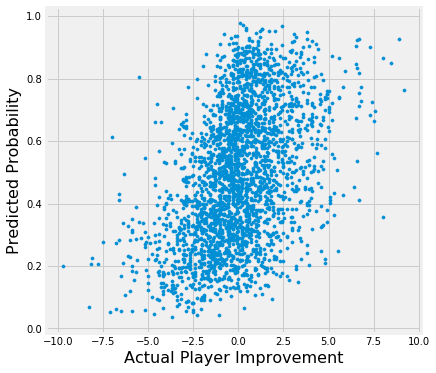

In [39]:
# Plot the predicted probability and true values
def plot_prob_value(model, Xtest, ytest):
    ypred = model.predict_proba(Xtest)[:,1]
    plt.figure(figsize=(6,6))
    _ = plt.scatter(ytest, ypred, s=10)
    _ = plt.xlabel('Actual Player Improvement', fontsize=16)
    _ = plt.ylabel('Predicted Probability', fontsize=16)
plot_prob_value(logreg, Xtest, ytest)

### 3.2 SVM

- **C：C-SVC的惩罚参数C，默认值是1.0**

    C越大，相当于惩罚松弛变量，希望松弛变量接近0，即对误分类的惩罚增大，趋向于对训练集全分对的情况，这样对训练集测试时准确率很高，但泛化能力弱。
    
    C值小，对误分类的惩罚减小，允许容错，将他们当成噪声点，泛化能力较强。


- kernel ：核函数，默认是rbf，可以是‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ 

    0 – 线性：u'v

    1 – 多项式：(gamma*u'*v + coef0)^degree

    2 – RBF函数：exp(-gamma|u-v|^2)

    3 –sigmoid：tanh(gamma*u'*v + coef0)


- degree ：多项式poly函数的维度，默认是3，选择其他核函数时会被忽略。

- **gamma** ： ‘rbf’,‘poly’ 和‘sigmoid’的核函数参数。默认是’auto’，则会选择1/n_features

- coef0 ：核函数的常数项。对于‘poly’和 ‘sigmoid’有用。

- probability ：是否采用概率估计？.默认为False

- shrinking ：是否采用shrinking heuristic方法，默认为true

- tol ：停止训练的误差值大小，默认为1e-3

- cache_size ：核函数cache缓存大小，默认为200

- class_weight ：类别的权重，字典形式传递。设置第几类的参数C为weight*C(C-SVC中的C)

- verbose ：允许冗余输出？

- max_iter ：最大迭代次数。-1为无限制。

- decision_function_shape ：‘ovo’, ‘ovr’ or None, default=None3

- random_state ：数据洗牌时的种子值，int值

In [40]:
from sklearn.svm import SVC
clf = SVC(random_state=42, probability=True)
params = {
    'C': [10, 100, 1000, 10000],
    'gamma': [1e-4, 0.001, 0.01, 0.1, 1, 10]
}
grid_search_cv_class(clf, params, Xtrain, ytrain_class)

Best parameters were {'C': 100, 'gamma': 0.01}


In [41]:
svc = SVC(random_state=42, probability=True, C=10000, gamma=0.001)
svc.fit(Xtrain, ytrain_class)
model_evaluation(svc, Xtest, ytest_class)

Accuracy of test set was 0.6490312965722802
Log loss of test set was 0.6241324898634422 

True Negative = 925	False Positive = 438
False Negative = 504	True Positive=817


             precision    recall  f1-score   support

          0       0.65      0.68      0.66      1363
          1       0.65      0.62      0.63      1321

avg / total       0.65      0.65      0.65      2684



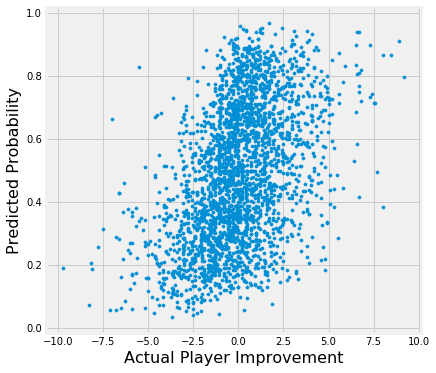

In [42]:
plot_prob_value(svc, Xtest, ytest)

Very similar performances between logistic regression and SVM.
### 3.3 Random Forest

- criterion: ”gini” or “entropy”(default=”gini”)是计算属性的gini(基尼不纯度)还是entropy(信息增益)，来选择最合适的节点。
- **n_estimators**：决策树的个数，越多越好，但是性能就会越差，至少100左右可以达到可接受的性能和误差率。
- **max_depth**: (default=None)设置树的最大深度，默认为None，这样建树时，会使每一个叶节点只有一个类别，或是达到min_samples_split。
- **min_samples_split**:根据属性划分节点时，每个划分最少的样本数。
- min_samples_leaf:叶子节点最少的样本数。
- max_leaf_nodes: (default=None)叶子树的最大样本数。
- min_weight_fraction_leaf: (default=0) 叶子节点所需要的最小权值
- verbose:(default=0) 是否显示任务进程


In [43]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
params = {
    'n_estimators': [101, 201, 401, 601, 801, 1001],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 10, 20],
}
grid_search_cv_class(clf, params, Xtrain, ytrain_class)

Best parameters were {'min_samples_split': 20, 'n_estimators': 1001, 'max_depth': 10}


In [44]:
rf = RandomForestClassifier(
                   n_estimators=601, max_depth=10, min_samples_split=2,
                   random_state=42)
rf.fit(Xtrain, ytrain_class)
model_evaluation(rf, Xtest, ytest_class)

Accuracy of test set was 0.6460506706408345
Log loss of test set was 0.6250714016567 

True Negative = 921	False Positive = 442
False Negative = 508	True Positive=813


             precision    recall  f1-score   support

          0       0.64      0.68      0.66      1363
          1       0.65      0.62      0.63      1321

avg / total       0.65      0.65      0.65      2684



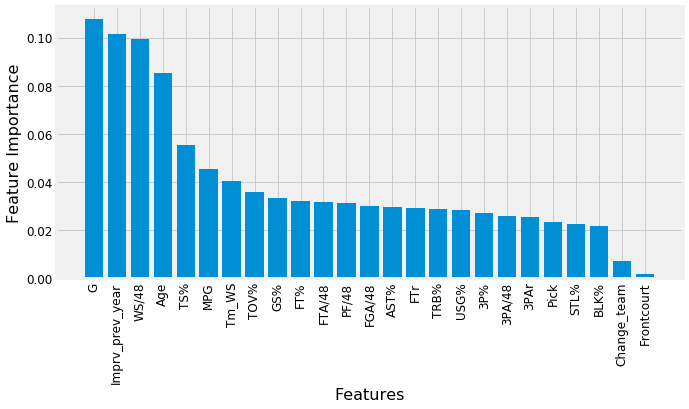

In [45]:
# Plot feature importances.
imp = pd.Series(rf.feature_importances_, index=data.columns)
imp = imp.sort_values(ascending=False)
plt.figure(figsize=(10,5))
_ = plt.bar(range(len(imp)), imp)
_ = plt.xticks(range(len(imp)), imp.index, rotation=90)
_ = plt.xlabel('Features', fontsize=16)
_ = plt.ylabel("Feature Importance", fontsize=16)
_ = plt.xticks(fontsize=12)
_ = plt.yticks(fontsize=12)

### 3.4 Gradient Boost

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
# Use some tuned parameters from random forest, only tune learning rate and n_estimators
clf = GradientBoostingClassifier(
                    min_samples_split=2, max_depth=10,
                    max_features='sqrt', random_state=42)
params = {
    'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
    'n_estimators': [25, 51, 101, 201, 401, 601, 1001],
}
grid_search_cv_class(clf, params, Xtrain, ytrain_class)

Best parameters were {'n_estimators': 401, 'learning_rate': 0.005}


In [47]:
gb = GradientBoostingClassifier(
                    min_samples_split=2, max_depth=10,
                    max_features='sqrt', random_state=42,
                    learning_rate=0.01, n_estimators=201)
gb.fit(Xtrain, ytrain_class)
model_evaluation(gb, Xtest, ytest_class)

Accuracy of test set was 0.650521609538003
Log loss of test set was 0.6255482386829783 

True Negative = 927	False Positive = 436
False Negative = 502	True Positive=819


             precision    recall  f1-score   support

          0       0.65      0.68      0.66      1363
          1       0.65      0.62      0.64      1321

avg / total       0.65      0.65      0.65      2684



The random forest model had the best performances out of all, but not by much.
### 3.5 Voting Model

In [48]:
from sklearn.ensemble import VotingClassifier
# Make a weights matrix
weights = [[int(x) for x in list("{0:0b}".format(i).zfill(4))] for i in range(1, 2**4)]
print('Weights matrix is', weights)
# Use CV to figure which models to use in the ensumble model
clf = VotingClassifier(
    estimators=[('logreg', logreg), ('svc', svc), ('rf', rf), ('gb', gb)],
    voting='soft')
params = {'weights': weights}
grid_search_cv_class(clf, params, Xtrain, ytrain_class)

Weights matrix is [[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 1], [0, 1, 0, 0], [0, 1, 0, 1], [0, 1, 1, 0], [0, 1, 1, 1], [1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 0], [1, 0, 1, 1], [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1]]
Best parameters were {'weights': [0, 1, 0, 0]}


In [49]:
voting = VotingClassifier(
    estimators=[('logreg', logreg), ('svc', svc), ('gb', gb)],
    voting='soft', weights = [1,1,1])
voting.fit(Xtrain, ytrain_class)
model_evaluation(voting, Xtest, ytest_class)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy of test set was 0.6508941877794336
Log loss of test set was 0.6202493964003674 

True Negative = 925	False Positive = 438
False Negative = 499	True Positive=822


             precision    recall  f1-score   support

          0       0.65      0.68      0.66      1363
          1       0.65      0.62      0.64      1321

avg / total       0.65      0.65      0.65      2684



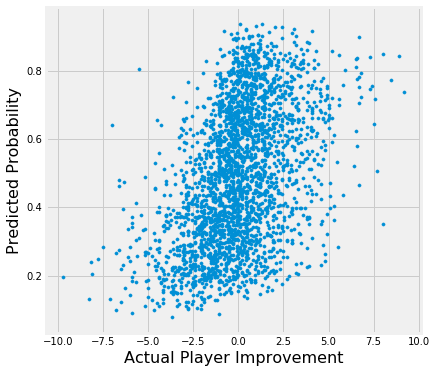

In [50]:
plot_prob_value(voting, Xtest, ytest)

### 3.6 ROC curve

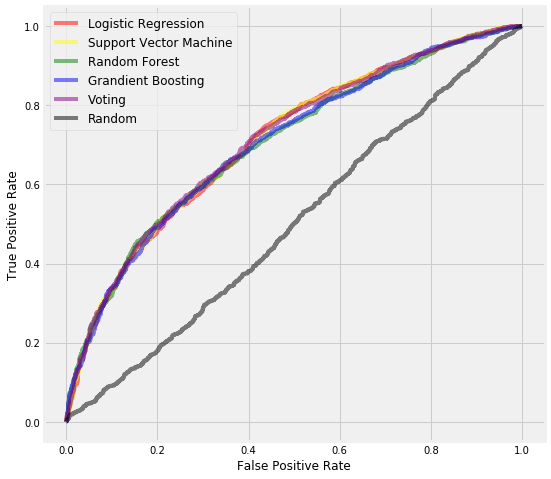

In [51]:
# Plot the precision-recall curve of different models on the test set.
from sklearn.metrics import roc_curve
models = [logreg, svc, rf, gb, voting]
labels = ['Logistic Regression', 'Support Vector Machine',
          'Random Forest', 'Grandient Boosting', 'Voting']
colors = ['red', 'yellow', 'green', 'blue', 'purple']
plt.figure(figsize=(8,8))
for index, model in enumerate(models):
    ypred_prob = model.predict_proba(Xtest)[:,1]
    fpr, tpr, _ = roc_curve(ytest_class, ypred_prob)
    _ = plt.step(fpr, tpr, color=colors[index], alpha=0.5, where='post', label=labels[index])
random = np.random.rand(len(ytest))
fpr, tpr , _ = roc_curve(ytest_class, random)
_ = plt.step(fpr, tpr, color='k', alpha=0.5, where='post', label='Random')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.legend(fontsize=12)

In this problem, we want the false positive rate to be lower. In other words, it is OK to have false negatives (miss some improved players), since a team can only have a limited number of players. But it is really bad to have false positives, because acquiring that player probably means loss of value for the team.

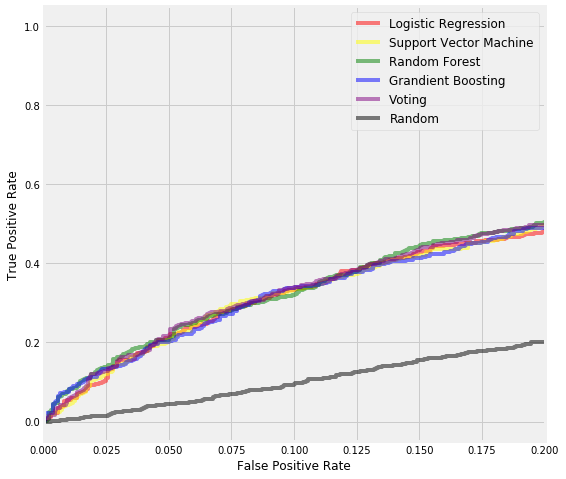

In [52]:
# Re-do the roc curve, but zoom in for false positive rate < 0.2
models = [logreg, svc, rf, gb, voting]
labels = ['Logistic Regression', 'Support Vector Machine',
          'Random Forest', 'Grandient Boosting', 'Voting']
colors = ['red', 'yellow', 'green', 'blue', 'purple']
plt.figure(figsize=(8,8))
for index, model in enumerate(models):
    ypred_prob = model.predict_proba(Xtest)[:,1]
    fpr, tpr, _ = roc_curve(ytest_class, ypred_prob)
    _ = plt.step(fpr, tpr, color=colors[index], alpha=0.5, where='post', label=labels[index])
random = np.random.rand(len(ytest))
fpr, tpr , _ = roc_curve(ytest_class, random)
_ = plt.step(fpr, tpr, color='k', alpha=0.5, where='post', label='Random')
_ = plt.xlim([0, 0.2])
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.legend(fontsize=12)

It seems like the voting model was on or near the top in most cases. But the differences between models were very very small.<br>